In [1]:
# instalacao da biblioteca para criacao da rede neural com algoritmos geneticos
!pip install pygad

     |████████████████████████████████| 53 kB 1.7 MB/s 


In [2]:
# importacao das bibliotacas utilizadas
import numpy 
import pygad
import pygad.nn
import pygad.gann

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:486: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 75.0
Change     = 75.0

Generation = 2
Fitness    = 75.0
Change     = 0.0

Generation = 3
Fitness    = 75.0
Change     = 0.0

Generation = 4
Fitness    = 75.0
Change     = 0.0

Generation = 5
Fitness    = 75.0
Change     = 0.0

Generation = 6
Fitness    = 75.0
Change     = 0.0

Generation = 7
Fitness    = 75.0
Change     = 0.0

Generation = 8
Fitness    = 100.0
Change     = 25.0

Generation = 9
Fitness    = 75.0
Change     = -25.0

Generation = 10
Fitness    = 100.0
Change     = 25.0

Generation = 11
Fitness    = 100.0
Change     = 0.0

Generation = 12
Fitness    = 100.0
Change     = 0.0

Generation = 13
Fitness    = 100.0
Change     = 0.0

Generation = 14
Fitness    = 100.0
Change     = 0.0

Generation = 15
Fitness    = 100.0
Change     = 0.0

Generation = 16
Fitness    = 100.0
Change     = 0.0

Generation = 17
Fitness    = 100.0
Change     = 0.0

Generation = 18
Fitness    = 100.0
Change     = 0.0

Generation = 19
Fitness    = 100.0
Change     = 0.0

Gener

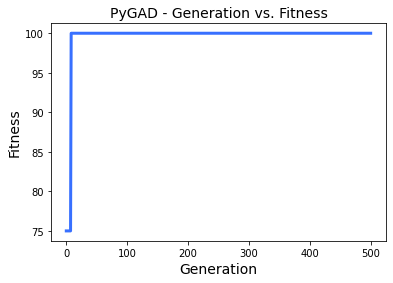

Parameters of the best solution : [  3.85911391 -10.23083619 -10.60013494   2.42236284   7.1678879
  -6.50821487  11.39145221   2.41776853]
Fitness value of the best solution = 100.0
Index of the best solution : 0
Best fitness value reached after 8 generations.
Predictions of the trained network : [0, 1, 1, 0]
Number of correct classifications : 4.
Number of wrong classifications : 0.
Classification accuracy : 100.0.


In [3]:
# funcao de avaliacao das solucoes propostas
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    # predicao com base na ultima camada da rede neural e os dados de entrada de exemplo
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    
    # verifica a quantidade de predicoes corretas
    correct_predictions = numpy.where(predictions == data_outputs)[0].size

    # score e a quantidade de solucoes corretas / quantidade totais de solucoes * 100
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

# funcao chamada apos cada geracao para atualizar os pesos da melhor solucao com base na evolucao do GA
def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    # retorna a matriz de pesos das solucoes
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)
    
    # atualiza os pesos das solucoes
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    # informa a geracao, o score da funcao fitness e a melhora com base na geracao anterior
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}\n".format(change=ga_instance.best_solution()[1] - last_fitness))

    # atualiza o score da melhor solucao
    last_fitness = ga_instance.best_solution()[1].copy()

# inicializacao da variavel que ira armazenar o grau de adequacao da geracao anterior 
last_fitness = 0

# matriz numpy com as entradas da logica XOR
data_inputs = numpy.array([[1, 1],
                           [1, 0],
                           [0, 1],
                           [0, 0]])

# vetor numpy com as saidas da logica XOR
data_outputs = numpy.array([0,
                            1,
                            1,
                            0])

# tamanho do vetor de entrada para cada amostra, ou seja, o numero de neuronios na camada de entrada
num_inputs = data_inputs.shape[1]

# numero de neuronios da camada de saida, ou seja, a quantidade de classes
num_classes = 2

# quantidade de solucoes da populacao
num_solutions = 6 

# instancia da classe GANN para treinar uma rede neural usando o algoritmo genetico
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=num_classes,
                                hidden_activations=["relu"],
                                output_activation="softmax")

# a populacao nao contem os pesos numericos da rede, em vez disso, armazena uma lista de referencias para cada ultima camada de cada rede
# da populacao. Uma solucao ou uma rede pode ser usada de forma intercambiavel

# Se houver uma populacao com 3 solucoes (ou seja, redes), entao a populacao e uma lista com 3 elementos.
# Cada elemento e uma referencia a ultima camada de cada rede. Usando essa referencia, todos os detalhes da rede podem ser acessados
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

# inicializao da populacao inicial
initial_population = population_vectors.copy()

# numero de solucoes a serem selecionadas como pais no pool de acasalamento
num_parents_mating = 4 

# numero de geracoes
num_generations = 500 

# porcentagem de mutacao
mutation_percent_genes = 5

# tipo de selecao dos pais
parent_selection_type = "sss" 

# tipo de implementacao do crossover
crossover_type = "single_point" 

# tipo de implementacao das mutacoes
mutation_type = "random" 

# numero de pais a serem mantidos na proxima populacao
keep_parents = 1 

# valores min e max do intervalo aleatorio de selecao a partir do qual os valores dos genes da populacao inicial sao selecionados
init_range_low = -2
init_range_high = 5

# instancia da classe GA para treino e validacao do GA
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Predicting the outputs of the data using the best solution.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

# Calculating some statistics
num_wrong = numpy.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))